## Network Science Assignment 1 (HS22)

David Diener 19-733-179


Rafael Dubach 18-755-180

# A01.1 Building and visualising networks


## A01.1 Building and visualising networks

Task: Build and visualise the following networks

1. Starnetwork
2. Fully-connected
3. One-dimensional lattice with periodic boundary conditions where each node i has degree k(i) = 2


In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt 
import networkx as nx

from google.colab import drive
drive.mount('/content/drive')

netscience = nx.read_gml("/content/drive/MyDrive/Colab Notebooks/graph_netsci.gml")
facebook = nx.read_gml("/content/drive/MyDrive/Colab Notebooks/graph_facebook.gml")
karate = nx.read_gml("/content/drive/MyDrive/Colab Notebooks/graph_karate.gml",label="id")


Mounted at /content/drive


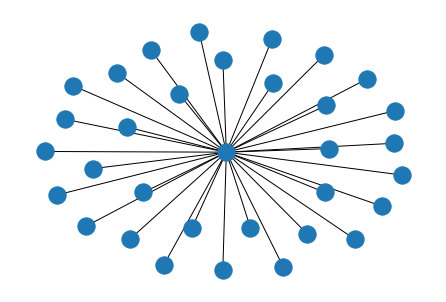

In [ ]:
star_graph = nx.star_graph(32, create_using=None)
nx.draw(star_graph)

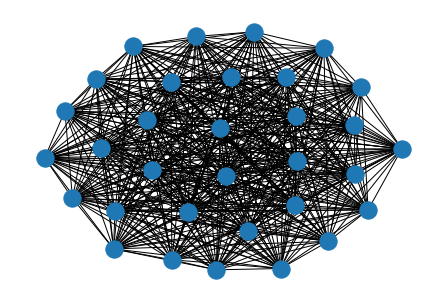

In [ ]:
fully_connected = nx.complete_graph(32, create_using=None)
nx.draw(fully_connected)

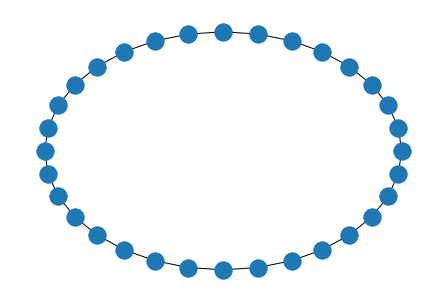

In [ ]:
G = nx.cycle_graph(32)
pos = nx.circular_layout(G)
nx.draw(G, pos)

# A01.2 Degree Distributions

## A01.2a Global properties 
For each one of the networks provided, compute the following network measures:

1. Compute the average degree⟨𝑘⟩ and the density 𝛿 of the networks.
2. Write a function max_degree that takes a network as its argument, and returns two values: the id/name/label of the node with the largest degree, and the value of its degree. Test it on the datasets given

In [ ]:
netscience_N_E = (netscience.number_of_nodes(), netscience.number_of_edges())
facebook_N_E = (facebook.number_of_nodes(), facebook.number_of_edges())
karate_N_E = (karate.number_of_nodes(), karate.number_of_edges())

In [ ]:
# Return avg. degree
netscience_avg_degree = (netscience_N_E[1]/netscience_N_E[0])
facebook_avg_degree = (facebook_N_E[1]/facebook_N_E[0])
karate_avg_degree = (karate_N_E[1]/karate_N_E[0])

print(
"Average degree ⟨𝑘⟩ of netscience:",netscience_avg_degree,"\n"
"Average degree ⟨𝑘⟩ of facebook:  ",facebook_avg_degree,"\n"
"Average degree ⟨𝑘⟩ of karate:    ",karate_avg_degree,"\n"
)



Average degree ⟨𝑘⟩ of netscience: 1.8767967145790554 
Average degree ⟨𝑘⟩ of facebook:   21.84550631344392 
Average degree ⟨𝑘⟩ of karate:     2.2941176470588234 



In [ ]:
# Return avg. density
netscience_avg_density = nx.density(netscience)
facebook_avg_density = nx.density(facebook)
karate_avg_density = nx.density(karate)

print(
"Average density ⟨𝛿⟩ of netscience:",netscience_avg_density,"\n"
"Average density ⟨𝛿⟩ of facebook:  ",facebook_avg_density,"\n"
"Average density ⟨𝛿⟩ of karate:    ",karate_avg_density,"\n"
)

Average density ⟨𝛿⟩ of netscience: 0.0025709544035329526 
Average density ⟨𝛿⟩ of facebook:   0.010819963503439287 
Average density ⟨𝛿⟩ of karate:     0.13903743315508021 



In [ ]:
#input: Graph, output: node with max degree & it's name
# Takes graph, converts to a list with tuple(name,degree) and takes max degree tuple
def function_max_degree(graph: nx.Graph):
  max_degree_tuple = max(list(graph.degree),key=lambda item:item[1])
  return max_degree_tuple

print(
"Max degree in netscience of node",function_max_degree(netscience)[0], "  is:",function_max_degree(netscience)[1], "\n"
"Max degree in facebook   of node",function_max_degree(facebook)[0], " is:",function_max_degree(facebook)[1], "\n"
"Max degree in karate     of node",function_max_degree(karate)[0], "  is:",function_max_degree(karate)[1], "\n"
)


Max degree in netscience of node 33   is: 34 
Max degree in facebook   of node 107  is: 1045 
Max degree in karate     of node 33   is: 17 



## A01.2b Degree Distributions
For the same networks, compute and plot the degree distribution

1. Select axis scales (lin-lin / lin-log / log-log) that allow you to
visualise better the distributions
2. Remember to bin the data accordingly to the scales selected

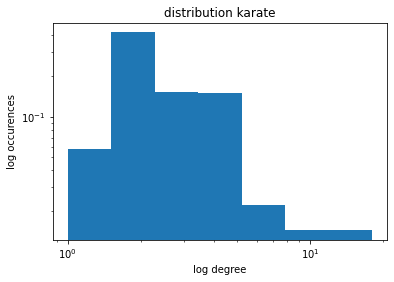

In [13]:
def degree_karate(graph: nx.Graph, name):
  degrees = sorted([d for n, d in graph.degree()], reverse=True)
  bin = np.logspace(np.log10(min(degrees)),np.log10(max(degrees)+1), 8)

  plt.hist(degrees, bins = bin,  density = True)
  plt.title("distribution "+name)
  plt.xlabel("log degree")
  plt.ylabel("log occurences")
  plt.xscale('log')
  plt.yscale('log')
  plt.show()
  print("\n")

  
# degree_lin_lin(netscience, "netscience")
degree_karate(karate, "karate")
# degree_lin_lin(facebook, "facebook")


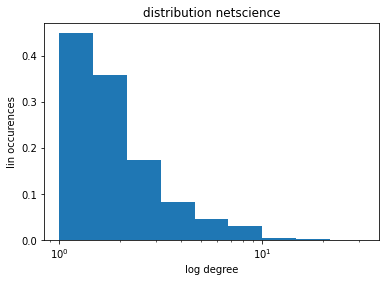

In [14]:
def degree_lin_log(graph: nx.Graph, name):
  degrees = sorted([d for n, d in graph.degree()], reverse=True)
  bin = np.logspace(0,1.5, base=10, num=10)

  plt.hist(degrees, bins = bin, density = True)
  plt.xscale('log')
  plt.title("distribution "+name)
  plt.xlabel("log degree")
  plt.ylabel("lin occurences")
  plt.show()
  print("\n")


degree_lin_log(netscience, "netscience")
# degree_lin_log(karate, "karate")
# degree_lin_log(facebook, "facebook")


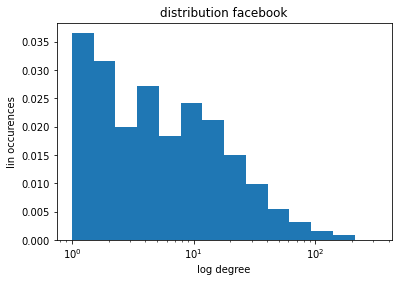

In [15]:
def degree_lin_log_2(graph: nx.Graph, name):
  degrees = sorted([d for n, d in graph.degree()], reverse=True)
  bin = np.logspace(0,2.5,base=10,num=15)

  plt.hist(degrees, bins = bin, density = True)
  plt.title("distribution "+name)
  plt.xscale('log')
  plt.xlabel("log degree")
  plt.ylabel("lin occurences")
  plt.show()
  print("\n")


#degree_log_log(netscience, "netscience")
#degree_log_log(karate, "karate")
degree_lin_log_2(facebook, "facebook")

We think that lin/lin does not fit any dataset for a good representation. We tested every dataset with all different scales. lin/lin, lin/log, log/log. The ones we picked for each dataset are the ones which we think suit it the best.